In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

from trigdat_reader import *
from threeML import *

import warnings                                                                                                                                
warnings.simplefilter('ignore')   


WARNING UserWarning: Using default configuration from /home/franz/miniconda2/lib/python2.7/site-packages/threeML/data/threeML_config.yml. You might want to copy it to /home/franz/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.



In [3]:
# we load the trigdat file
trig_reader = TrigReader('glg_trigdat_all_bn130305486_v02.fit',fine=True,verbose=False)

<IPython.core.display.Javascript object>


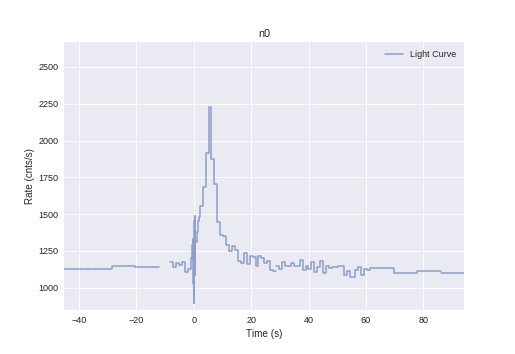

<IPython.core.display.Javascript object>


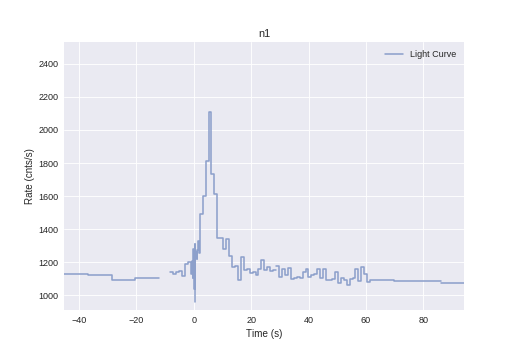

<IPython.core.display.Javascript object>


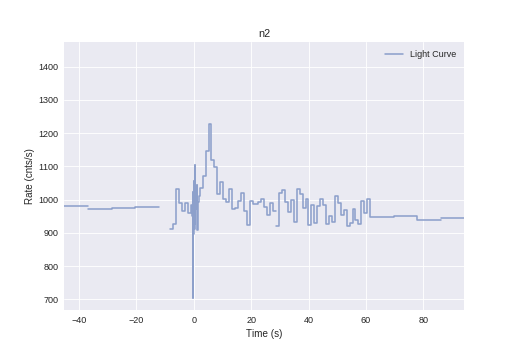

<IPython.core.display.Javascript object>


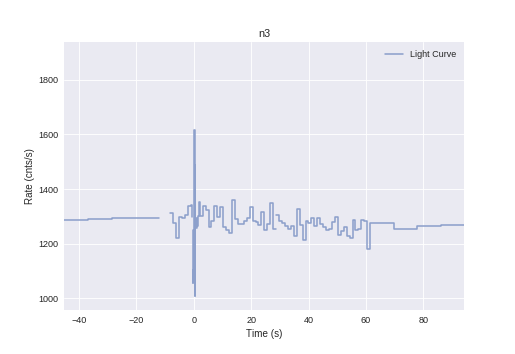

<IPython.core.display.Javascript object>


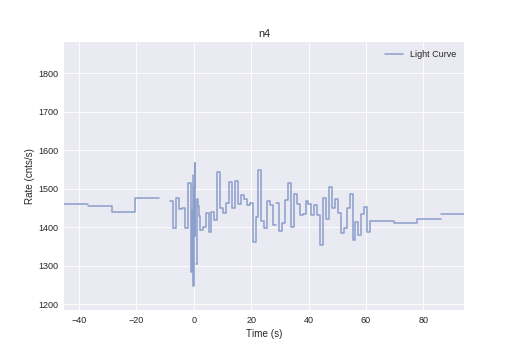

<IPython.core.display.Javascript object>


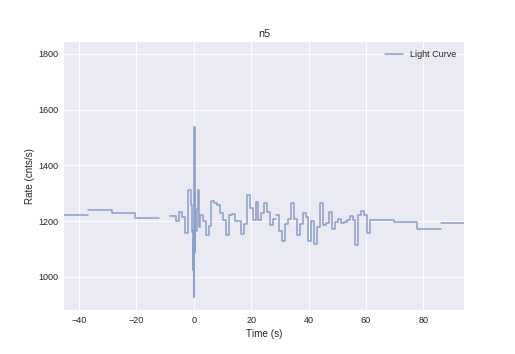

<IPython.core.display.Javascript object>


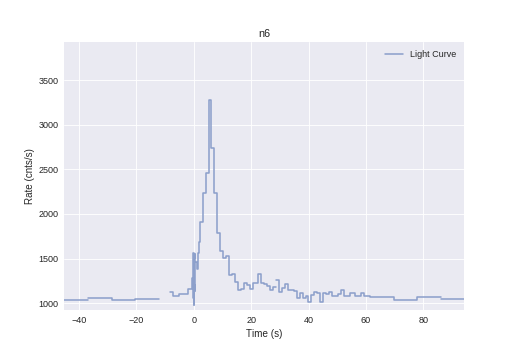

<IPython.core.display.Javascript object>


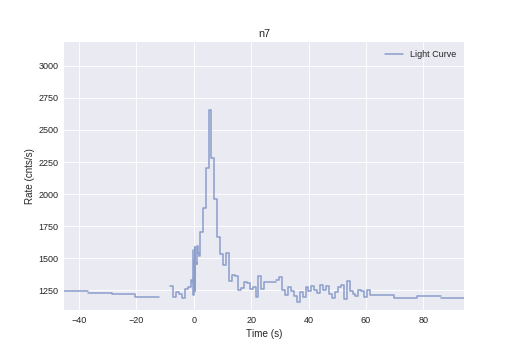

<IPython.core.display.Javascript object>


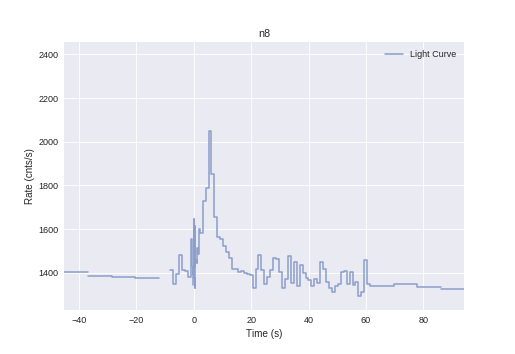

<IPython.core.display.Javascript object>


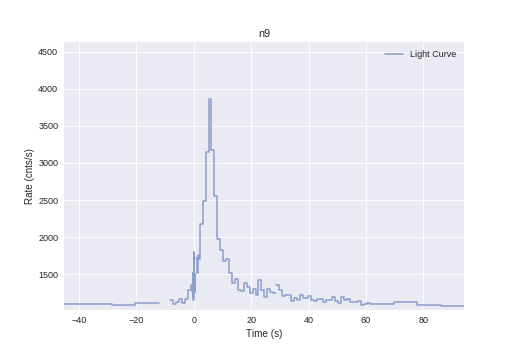

<IPython.core.display.Javascript object>


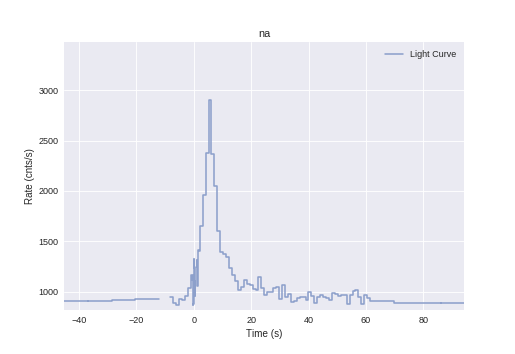

<IPython.core.display.Javascript object>


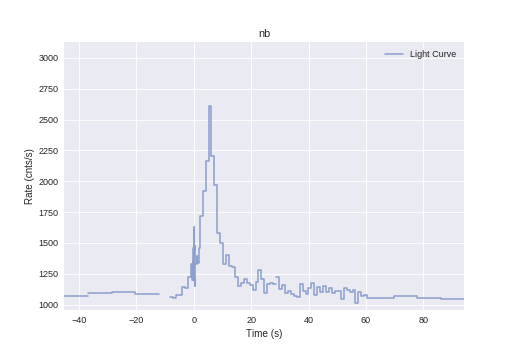

<IPython.core.display.Javascript object>


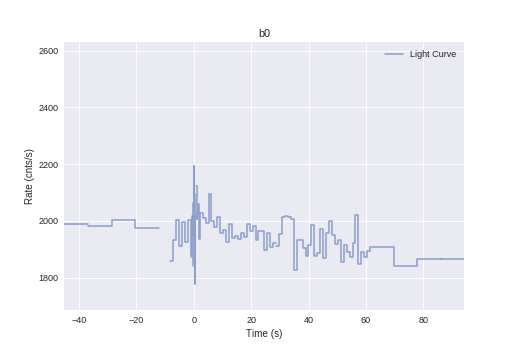

<IPython.core.display.Javascript object>


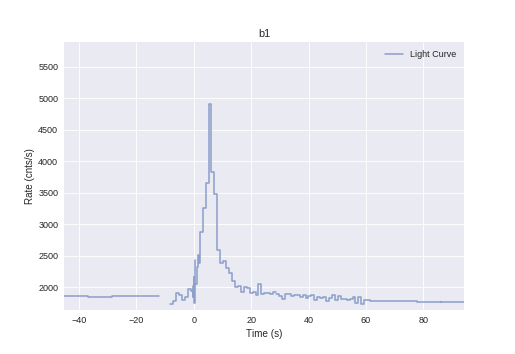

In [4]:
# we plot the lightcurve
trig_reader.view_lightcurve(start=-50, stop=100)

In [5]:
# we make our selections for the lightcurve
trig_reader.set_background_selections('-50--10','40-100')
trig_reader.set_active_time_interval('2-9')

Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 2




Binned 2-order polynomial fit with the Powell method


Auto-determined polynomial order: 2




Binned 2-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 2




Binned 2-order polynomial fit with the Powell method


Auto-determined polynomial order: 2




Binned 2-order polynomial fit with the Powell method


Auto-determined polynomial order: 2




Binned 2-order polynomial fit with the Powell method


Auto-determined polynomial order: 1




Binned 1-order polynomial fit with the Powell method


Auto-determined polynomial order: 2




Binned 2-order polynomial fit with the Powell method




<IPython.core.display.Javascript object>


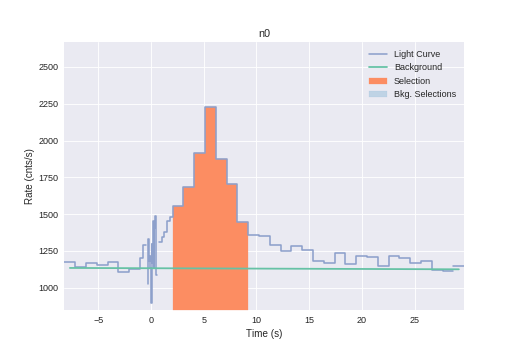

<IPython.core.display.Javascript object>


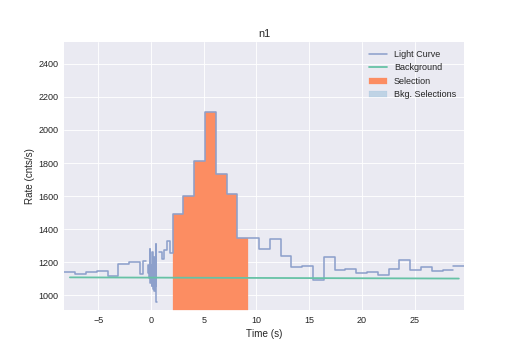

<IPython.core.display.Javascript object>


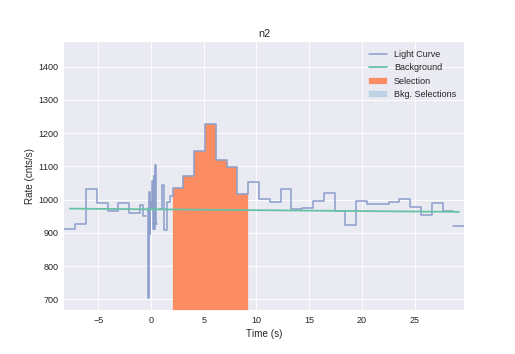

<IPython.core.display.Javascript object>


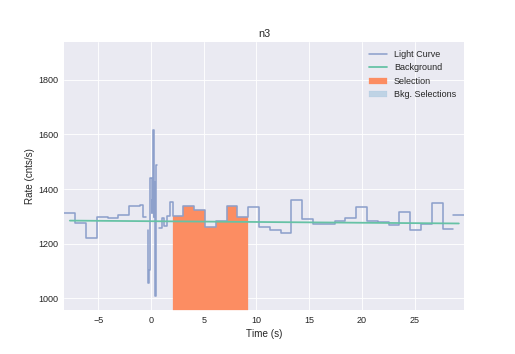

<IPython.core.display.Javascript object>


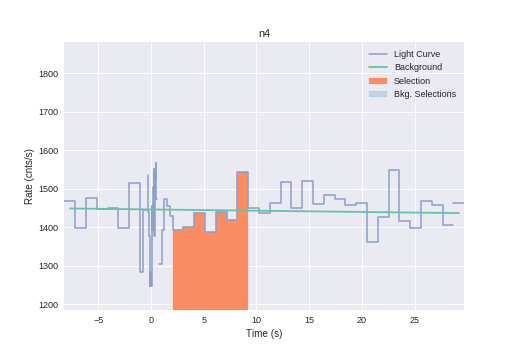

<IPython.core.display.Javascript object>


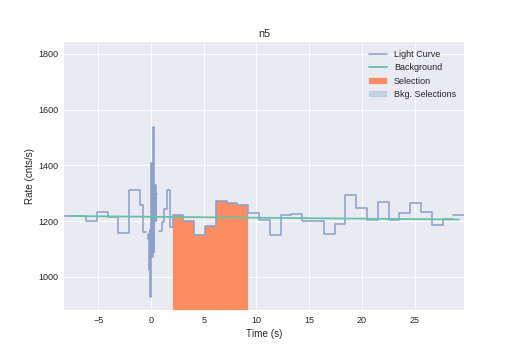

<IPython.core.display.Javascript object>


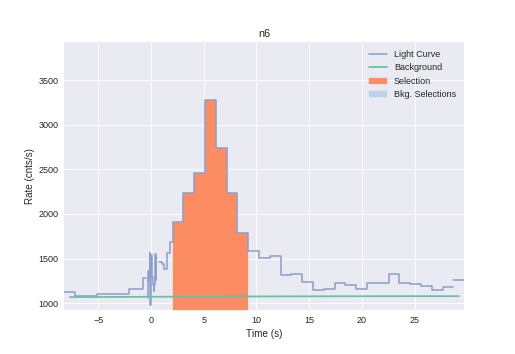

<IPython.core.display.Javascript object>


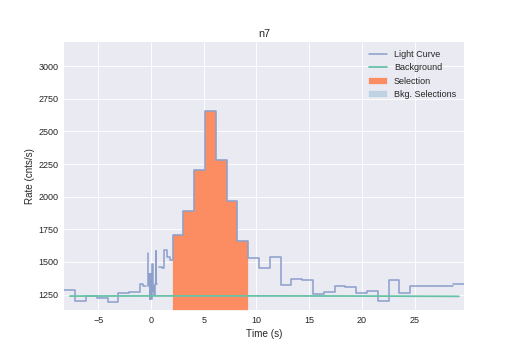

<IPython.core.display.Javascript object>


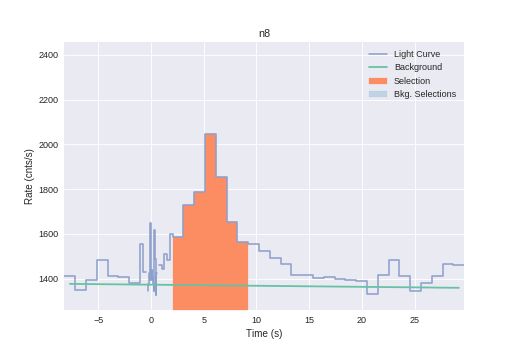

<IPython.core.display.Javascript object>


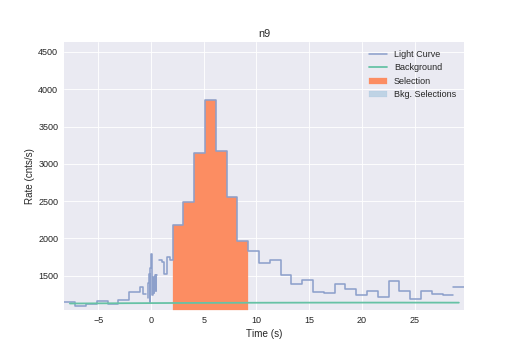

<IPython.core.display.Javascript object>


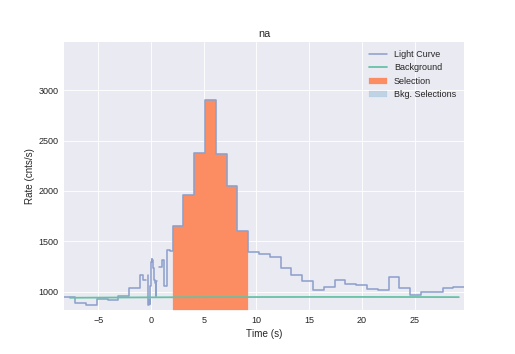

<IPython.core.display.Javascript object>


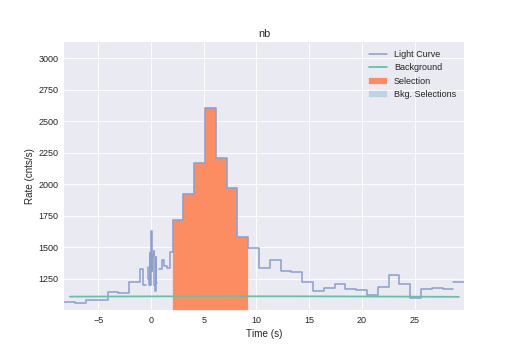

<IPython.core.display.Javascript object>


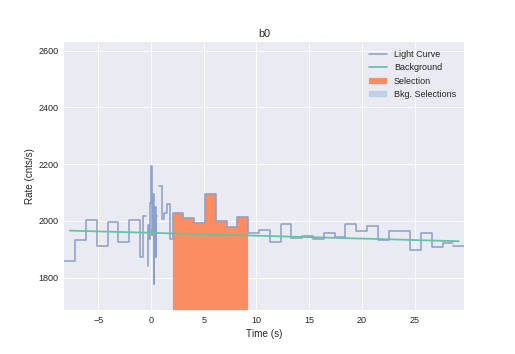

<IPython.core.display.Javascript object>


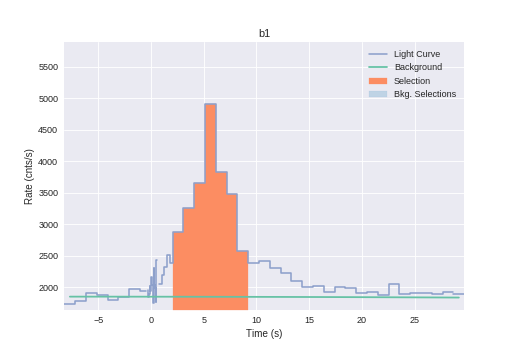

In [6]:
trig_reader.view_lightcurve(start=-10, stop=30)

In [7]:
# we choose which detectors to use and create the data plugin
det_list=['n6','n7','n8','n9','na','nb','b1']

trigdata  = trig_reader.to_plugin(*det_list)

Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8
Auto-probed noise models:
- observation: poisson
- background: gaussian
Range c1-c6 translates to channels 1-6
Now using 6 channels out of 8


<IPython.core.display.Javascript object>


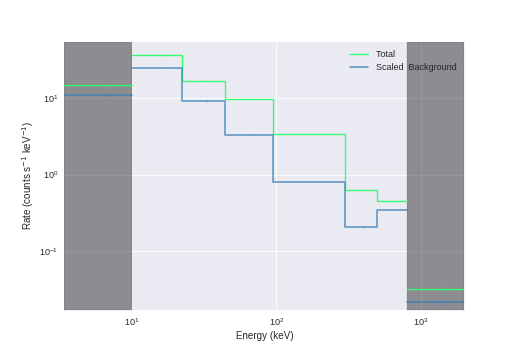

<IPython.core.display.Javascript object>


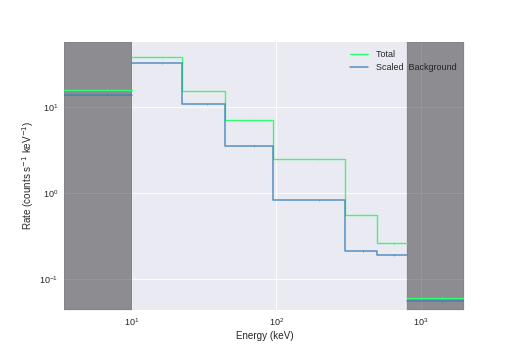

<IPython.core.display.Javascript object>


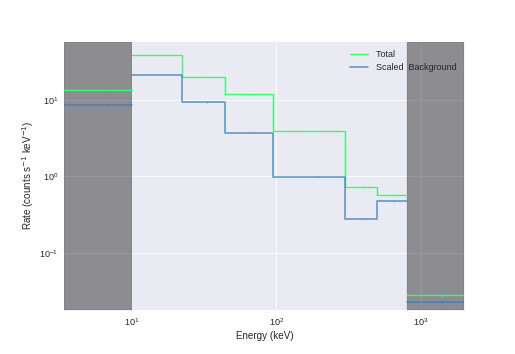

<IPython.core.display.Javascript object>


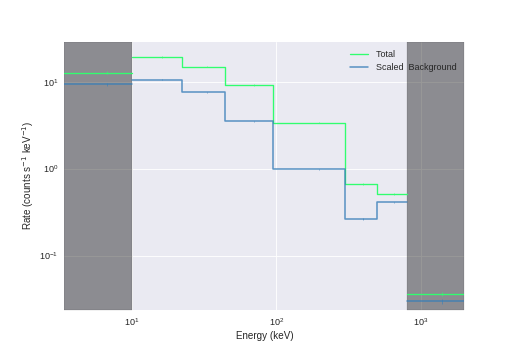

<IPython.core.display.Javascript object>


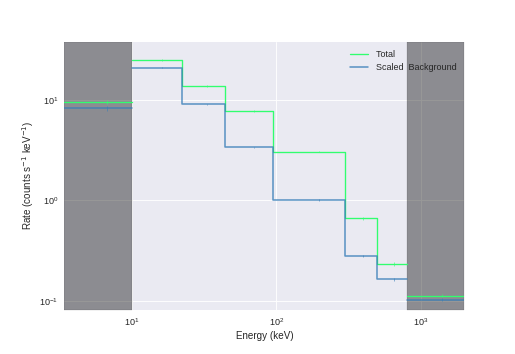

<IPython.core.display.Javascript object>


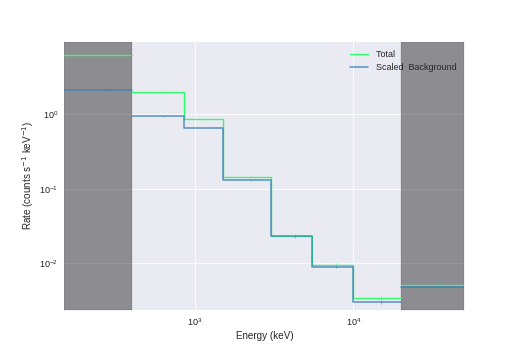

In [8]:
#display count spectrum for the detectors
for det_data in trigdata:
    det_data.view_count_spectrum()

In [11]:
# create data list for our detector data
data_list = DataList(*trigdata)

In [13]:
# we define our model for the source. in this case a cur-off power-law
cpl = Cutoff_powerlaw()                                                   
                                                                                
cpl.K.prior = Log_uniform_prior(lower_bound=1e-5, upper_bound=500)      
cpl.xc.prior = Log_uniform_prior(lower_bound=10, upper_bound=1e4)                                                                                       
cpl.index.set_uninformative_prior(Uniform_prior)

# we set up an initial value for the ra, dec (which one is not important, does not change the results of the fit)
ra, dec = 0,0
model = Model(PointSource('test',ra,dec,spectral_shape=cpl))

In [ ]:
# wrap for ra angle
wrap = [0]*len(model.free_parameters)                                                                              
wrap[0] = 1                                                                                                                                
                           
# we use multinest to sample the posterior dsistribution(best to run this in parallel and not in a notebook)
_ =bayes.sample_multinest(500,                                                                                                             
                            chain_name=main_path+trigger+'/chains/test',                                                                       
                            importance_nested_sampling=False,                                                                                  
                            const_efficiency_mode=False,                                                                                       
                            wrapped_params=wrap,                                                                                               
                            verbose=True,                                                                                                      
                            resume=False) 

In [ ]:
# save results
bayes.results.write_to('location_results.fits', overwrite=True) 

In [ ]:
# save residuals plot
residuals_plot = display_spectrum_model_counts(bayes);                           
residuals_plot.savefig('residuals_plot.pdf')     
                                                                                
# save corner plot                                                                   
corner_plot = res.corner_plot_cc()                                                  
corner_plot.savefig('corner_plot.pdf')

In [4]:
# load analysis results file and display results
results = load_analysis_results('location_results.fits')
results.display()

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
test.position.ra,(1.155 +/- 0.006) x 10^2,deg
test.position.dec,(5.16 +/- 0.06) x 10,deg
test.spectrum.main.Cutoff_powerlaw.K,1.08 -0.07 +0.06,1 / (cm2 keV s)
test.spectrum.main.Cutoff_powerlaw.index,(-6.70 -0.15 +0.14) x 10^-1,
test.spectrum.main.Cutoff_powerlaw.xc,(6.34 -0.26 +0.25) x 10^2,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
b1,-69.072864
n6,-65.847538
n7,-60.161167
n9,-76.649387
na,-58.369846
nb,-56.765884
total,-386.866687



Values of statistical measures:



,statistical measures
AIC,785.733373
BIC,791.650968
DIC,732.529842
PDIC,4.869396
log(Z),-166.499079


<IPython.core.display.Javascript object>


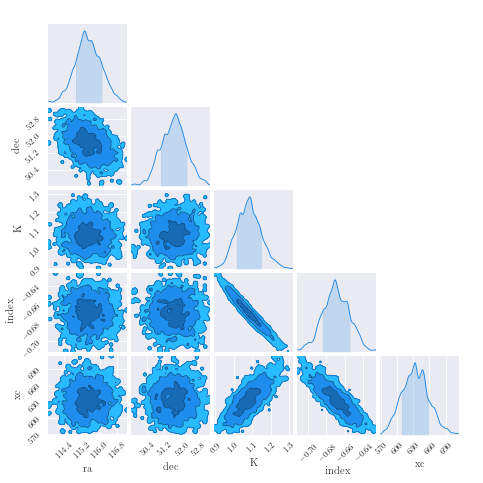

In [5]:
# display corner plot
results.corner_plot_cc();